# Supply Chain Emissions Modeling Using Industry and Commodity Data (2010–2016)

Problem Statement:

You have annual supply chain emission data from 2010–2016 categorized into industries and commodities. The goal is to develop a regression model that can predict the Supply Chain Emission Factors with Margins based on descriptive and quality metrics (substance, unit, reliability, temporal/geographical/technological/data collection correlations, etc.).

# Step 1: Import Required Libraries

In [1]:

import pandas as pd # data analysis
import numpy as np  # for numerical data
import seaborn as sns # data visualization advanced
import matplotlib.pyplot as plt # basic

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler # Feature Scaling
from sklearn.ensemble import RandomForestRegressor  # numeric and categoric data together
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os


# Step 2: Load Dataset

In [2]:
excel_file = 'SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'  # Replace with actual path
years = range(2010, 2017)

df = pd.read_excel(r"/content/SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx")

In [3]:
years[0]

2010

In [4]:
df_1 = pd.read_excel(excel_file, sheet_name='SupplyChainEmissionFactorsforUS')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.425,0.044,0.470,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.206,0.024,0.229,NaN,4,2,1,4,1


In [5]:
df_2 = pd.read_excel(excel_file, sheet_name='SupplyChainEmissionFactorsforUS')
df_2.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.425,0.044,0.470,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.206,0.024,0.229,NaN,4,2,1,4,1


In [6]:
all_data = []

for year in years:
    try:
        # Read the data from the single sheet for each year
        df_year = pd.read_excel(excel_file, sheet_name='SupplyChainEmissionFactorsforUS')

        # Add a 'Year' column
        df_year['Year'] = year

        # Determine the 'Source' based on the presence of specific columns
        # Assuming 'Commodity Code' and 'Commodity Name' exist for commodity rows
        # and 'Industry Code' and 'Industry Name' exist for industry rows in the same sheet
        df_year['Source'] = 'Unknown' # Initialize with 'Unknown'
        if 'Commodity Code' in df_year.columns and 'Commodity Name' in df_year.columns:
             # Assign 'Commodity' if Commodity Code is not null
            df_year.loc[df_year['Commodity Code'].notna(), 'Source'] = 'Commodity'

        if 'Industry Code' in df_year.columns and 'Industry Name' in df_year.columns:
            # Assign 'Industry' if Industry Code is not null
            df_year.loc[df_year['Industry Code'].notna(), 'Source'] = 'Industry'


        # Strip whitespace from column names
        df_year.columns = df_year.columns.str.strip()

        all_data.append(df_year)

    except Exception as e:
        print(f"Error processing year {year}: {e}")

# Concatenate all dataframes
if all_data:
    df = pd.concat(all_data, ignore_index=True)
    print("Data concatenated successfully.")
else:
    print("No dataframes to concatenate. Check data loading in the loop.")

Data concatenated successfully.


In [7]:
df = pd.concat(all_data, ignore_index=True)
df.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Year,Source
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.425,0.044,0.470,NaN,4,2,1,4,1,2010,Commodity
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1,2010,Commodity
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1,2010,Commodity
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1,2010,Commodity
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.206,0.024,0.229,NaN,4,2,1,4,1,2010,Commodity


# Step 3: Data Preprocessing

In [8]:
df.columns

Index(['Commodity Code', 'Commodity Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Year', 'Source'],
      dtype='object')

In [9]:
# As there is no data avaialble in Unnamed coulmn so we will drop the column
df.drop(columns=['Unnamed: 7'],inplace=True)

In [10]:
df.columns

Index(['Commodity Code', 'Commodity Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Year', 'Source'],
      dtype='object')

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Commodity Code                                          1848 non-null   object 
 1   Commodity Name                                          1848 non-null   object 
 2   Substance                                               1848 non-null   object 
 3   Unit                                                    1848 non-null   object 
 4   Supply Chain Emission Factors without Margins           1848 non-null   float64
 5   Margins of Supply Chain Emission Factors                1848 non-null   float64
 6   Supply Chain Emission Factors with Margins              1848 non-null   float64
 7   DQ ReliabilityScore of Factors without Margins          1848 non-null   int64  
 8   DQ TemporalCorrelation of Factors with

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,1848.0,0.077795,0.239085,0.0,0.0,0.002,0.04325,2.914
Margins of Supply Chain Emission Factors,1848.0,0.004057,0.022933,0.0,0.0,0.000,0.00000,0.321
Supply Chain Emission Factors with Margins,1848.0,0.081871,0.243109,0.0,0.0,0.002,0.04350,2.914
DQ ReliabilityScore of Factors without Margins,1848.0,3.416667,0.564788,2.0,3.0,3.000,4.00000,4.000
DQ TemporalCorrelation of Factors without Margins,1848.0,2.000000,0.000000,2.0,2.0,2.000,2.00000,2.000
DQ GeographicalCorrelation of Factors without Margins,1848.0,1.000000,0.000000,1.0,1.0,1.000,1.00000,1.000
DQ TechnologicalCorrelation of Factors without Margins,1848.0,2.795455,1.247994,1.0,1.0,3.000,4.00000,5.000
DQ DataCollection of Factors without Margins,1848.0,1.000000,0.000000,1.0,1.0,1.000,1.00000,1.000
Year,1848.0,2013.000000,2.000541,2010.0,2011.0,2013.000,2015.00000,2016.000


In [13]:
df.isnull().sum()

,0
Commodity Code,0
Commodity Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0
DQ GeographicalCorrelation of Factors without Margins,0


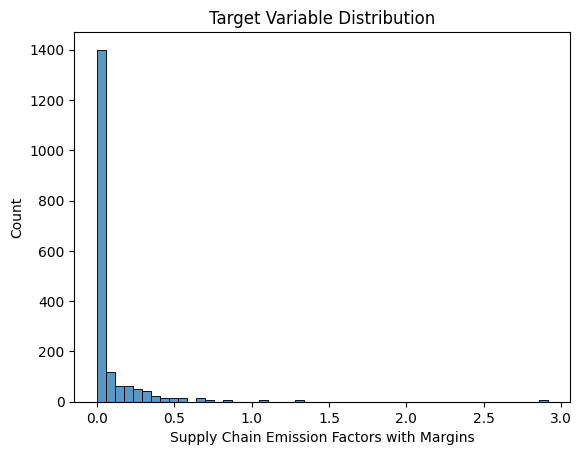

In [14]:
# Visualize distribution
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50)
plt.title('Target Variable Distribution')
plt.show()

In [15]:
# Check categorical variables
print(df['Substance'].value_counts())

Substance
carbon dioxide    462
methane           462
nitrous oxide     462
other GHGs        462
Name: count, dtype: int64


In [16]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         1386
kg CO2e/2018 USD, purchaser price     462
Name: count, dtype: int64


In [17]:
print(df['Source'].value_counts())

Source
Commodity    1848
Name: count, dtype: int64


In [18]:
df['Substance'].unique()

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [19]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3}

In [20]:
df['Substance']=df['Substance'].map(substance_map)

In [21]:
df['Substance'].unique()

array([0, 1, 2, 3])

In [22]:
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [23]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1}

In [24]:
df['Unit']=df['Unit'].map(unit_map)

In [25]:
print(df['Unit'].unique())

[0 1]


In [26]:
print(df['Source'].unique())

['Commodity']


In [27]:
source_map={'Commodity':0, 'Industry':1}

In [28]:
df['Source']=df['Source'].map(source_map)

In [29]:
print(df['Source'].unique())

[0]


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Commodity Code                                          1848 non-null   object 
 1   Commodity Name                                          1848 non-null   object 
 2   Substance                                               1848 non-null   int64  
 3   Unit                                                    1848 non-null   int64  
 4   Supply Chain Emission Factors without Margins           1848 non-null   float64
 5   Margins of Supply Chain Emission Factors                1848 non-null   float64
 6   Supply Chain Emission Factors with Margins              1848 non-null   float64
 7   DQ ReliabilityScore of Factors without Margins          1848 non-null   int64  
 8   DQ TemporalCorrelation of Factors with

In [32]:
df['Commodity Code'].unique()

array(['111CA', '113FF', 211, 212, 213, 22, 23, '311FT', '313TT', '315AL',
       321, 322, 323, 324, 325, 326, 327, 331, 332, 333, 334, 335,
       '3361MV', '3364OT', 337, 339, 42, 441, 445, 452, 481, 482, 483,
       484, 485, 486, '487OS', 493, '4A0', 511, 512, 513, 514, '521CI',
       523, 524, 525, '532RL', 5411, '5412OP', 5415, 55, 561, 562, 61,
       621, 622, 623, 624, '711AS', 713, 721, 722, 81, 'HS', 'ORE'],
      dtype=object)

In [33]:
df['Commodity Name'].unique()

array(['Farms', 'Forestry, fishing, and related activities',
       'Oil and gas extraction', 'Mining, except oil and gas',
       'Support activities for mining', 'Utilities', 'Construction',
       'Food and beverage and tobacco products',
       'Textile mills and textile product mills',
       'Apparel and leather and allied products', 'Wood products',
       'Paper products', 'Printing and related support activities',
       'Petroleum and coal products', 'Chemical products',
       'Plastics and rubber products', 'Nonmetallic mineral products',
       'Primary metals', 'Fabricated metal products', 'Machinery',
       'Computer and electronic products',
       'Electrical equipment, appliances, and components',
       'Motor vehicles, bodies and trailers, and parts',
       'Other transportation equipment', 'Furniture and related products',
       'Miscellaneous manufacturing', 'Wholesale trade',
       'Motor vehicle and parts dealers', 'Food and beverage stores',
       'General

In [34]:
len(df['Commodity Name'].unique())

66

In [35]:
# Drop non-numeric columns not needed,
# Alos drop Code and Year columns since there is no need of both of the columns
df.drop(columns=['Commodity Code','Commodity Name', 'Year'], inplace=True)

In [40]:
len(df['Commodity Code'].unique())

KeyError: 'Commodity Code'

In [38]:
df.shape

(1848, 11)

In [41]:
# Define features and target
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']

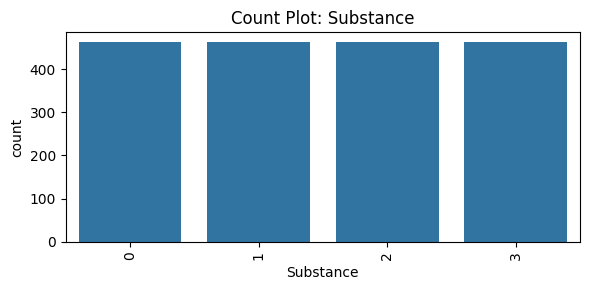

In [42]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

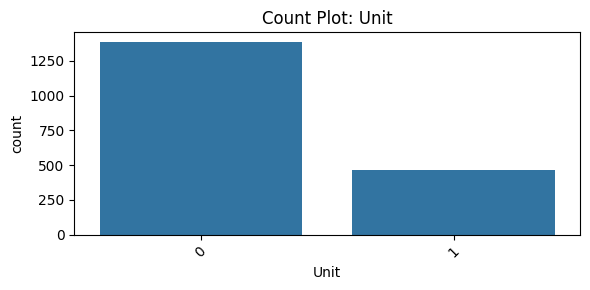

In [43]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


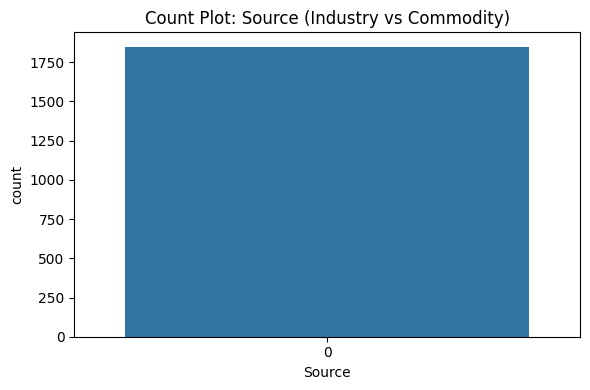

In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

In [45]:
df.select_dtypes(include=np.number).corr()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000,0.774597,-0.413313,-0.236509,-0.428831,0.390020,NaN,NaN,0.450769,NaN,NaN
Unit,0.774597,1.000000,-0.170749,-0.102159,-0.177605,0.224644,NaN,NaN,0.557401,NaN,NaN
Supply Chain Emission Factors without Margins,-0.413313,-0.170749,1.000000,0.128893,0.995610,-0.170015,NaN,NaN,0.018239,NaN,NaN
Margins of Supply Chain Emission Factors,-0.236509,-0.102159,0.128893,1.000000,0.221138,-0.075565,NaN,NaN,0.067013,NaN,NaN
Supply Chain Emission Factors with Margins,-0.428831,-0.177605,0.995610,0.221138,1.000000,-0.174331,NaN,NaN,0.024209,NaN,NaN
DQ ReliabilityScore of Factors without Margins,0.390020,0.224644,-0.170015,-0.075565,-0.174331,1.000000,NaN,NaN,0.336057,NaN,NaN
DQ TemporalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,0.450769,0.557401,0.018239,0.067013,0.024209,0.336057,NaN,NaN,1.000000,NaN,NaN
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               1848 non-null   int64  
 1   Unit                                                    1848 non-null   int64  
 2   Supply Chain Emission Factors without Margins           1848 non-null   float64
 3   Margins of Supply Chain Emission Factors                1848 non-null   float64
 4   Supply Chain Emission Factors with Margins              1848 non-null   float64
 5   DQ ReliabilityScore of Factors without Margins          1848 non-null   int64  
 6   DQ TemporalCorrelation of Factors without Margins       1848 non-null   int64  
 7   DQ GeographicalCorrelation of Factors without Margins   1848 non-null   int64  
 8   DQ TechnologicalCorrelation of Factors

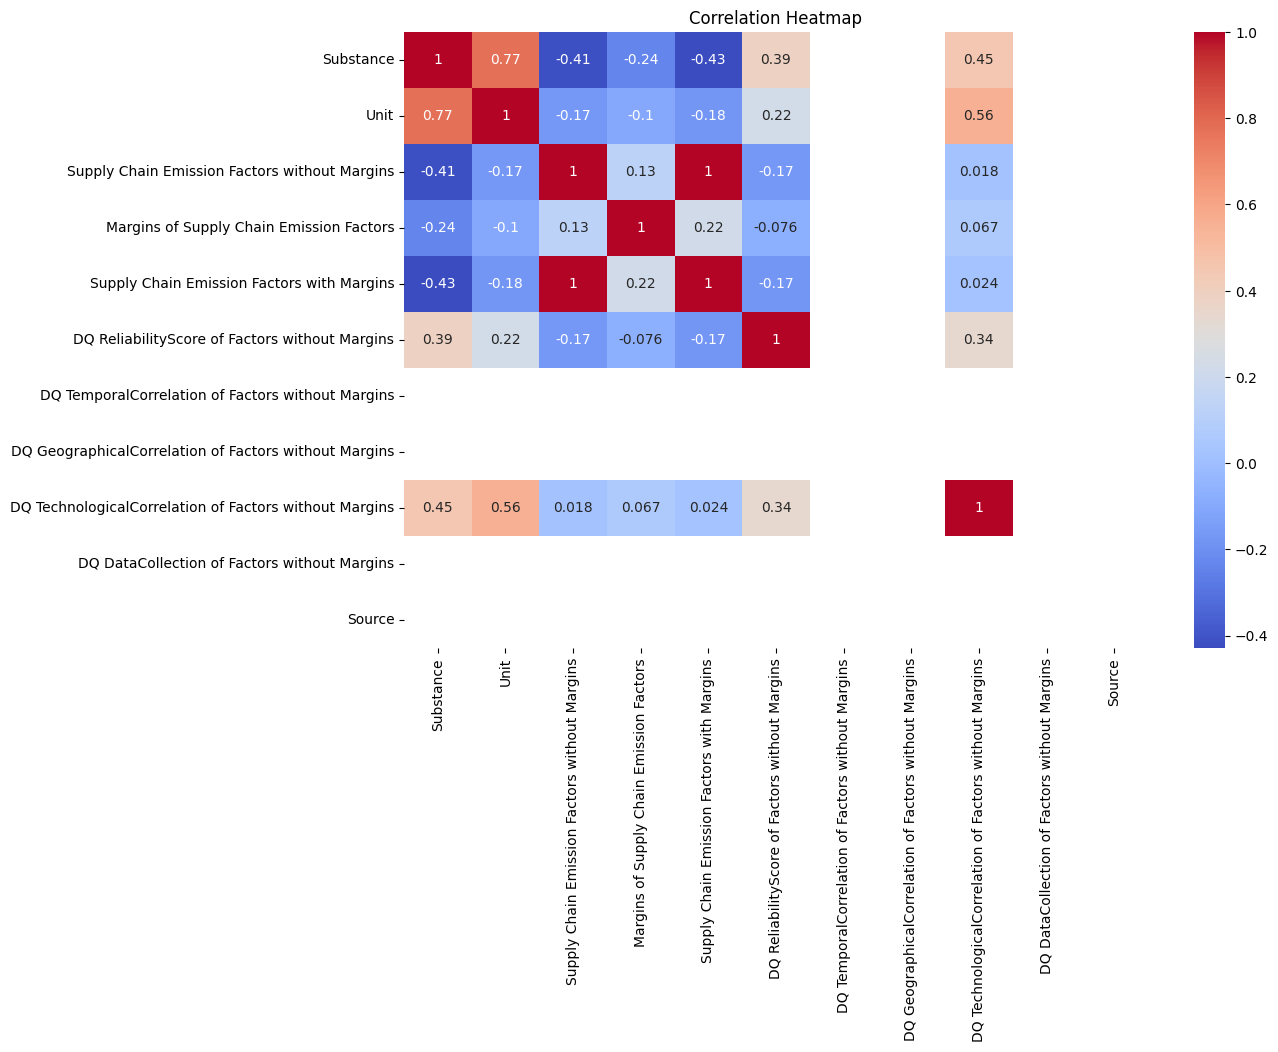

In [47]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Normalize features

In [48]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Divide the data into train and test

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Select the model for training

In [50]:
model = RandomForestRegressor(random_state=42)

### Training

In [51]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Prediction anf Evaluation

In [52]:
y_pred = model.predict(X_test)
# r2_sccore approx 1 gives us perfecr model

In [53]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

RMSE: 0.0002294874667171756
R² Score: 0.9999988259149796


### Hyperparameter Tuning

In [54]:
# When the model performs very well on the training data we say that it is overfit

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


### Use best parameters for prediction

In [55]:
y_pred_best = best_model.predict(X_test)

print("Final RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Final R²:", r2_score(y_test, y_pred_best))

Final RMSE: 0.0005480366838297473
Final R²: 0.9999933042248241


### Save model and encoders

In [62]:
!mkdir models

mkdir: cannot create directory ‘models’: File exists


In [61]:
# Save model and encoders
joblib.dump(best_model, 'models/final_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')


['models/scaler.pkl']

In [60]:
X.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')